k 近邻法(k-nearest neighbor, k-NN) 是基本的分类和归回方法。k 值选择、距离度量和分类规则是 KNN 的三个基本要素

* [3.1 k 近邻算法](#3.1-k-近邻算法)
* [3.2 k 近邻模型](#3.2-k-近邻模型)
  * [3.2.1 模型](#3.2.1-模型)
  * [3.2.2 距离度量](#3.2.2-距离度量)
  * [3.2.3 k 值的选择](#3.2.3-k-值的选择)
  * [3.2.4 分类决策规则](#3.2.4-分类决策规则)
* [3.3 k 近邻法的实现：kd 树](#3.3-k-近邻法的实现：kd-树)
  * [3.3.1 构造 kd 树](#3.3.1-构造-kd-树)
  * [3.3.1 搜索 kd 树](#3.3.2-搜索-kd-树)
* [算法实现](#算法实现)
* [习题](#习题)

# 3.1 k 近邻算法

k 近邻算法很直接，假定给定训练集中实例类别是确定的，对于新实例，由其周围最近的 k 个实例按规则表决确定类别。当 $k = 1$ 时，称为最近邻算法

输入：
$$
T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}
$$
输出：实例 x 的类别 y

**邻域 $N_{k}(x)$ ：** 按照给定度量距离，涵盖距离 $x$ 最近的 $k$ 个点的邻域

邻域内按照规则：
$$
y=\arg \max _{c_{j}} \sum_{x_{i} \in N_{k}(x)} I\left(y_{i}=c_{j}\right), \quad i=1,2, \cdots, N ; j=1,2, \cdots, K
$$
表决 $x$ 的类别。其中 $I$ 是指示函数，即当  $y_{i} = c_{i}$ 时 $I$ 为 1，否则为 0

k 近邻算法没有显示的学习过程

# 3.2 k 近邻模型

## 3.2.1 模型

k 近邻法对应着特征空间的划分，当训练集、距离度量、k 值和分类规则确定后，$x$ 的分类就确定了，也即特征空间的划分确定了。

所有距离实例点 $x_{i}$ 相比其他点更近的点组成了一个区域，叫做单元(cell)。每个实例都有一个单元，所有实例的单元构成一个划分

## 3.2.2 距离度量

特征空间中两个点的距离是两个实例相似程度的反映。

设特征空间 $\mathcal{X}$ 是 $n$ 维实数向量空间 $R^n$，$x_{i}, x_{j} \in \mathcal{X}, x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}$，$x_{j}=\left(x_{j}^{(1)}, x_{j}^{(2)}, \cdots, x_{j}^{(n)}\right)^{\mathrm{T}}$，$x_{i},x_{j}$ 间的距离 $L_{p}$ 定义为：
$$
L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}
$$
这里 $p \geqslant 1$ ，当 $p = 2$ ，成为欧氏距离（Euclidean distance）
$$
L_{2}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{2}\right)^{\frac{1}{2}}
$$
当 $p = 1$，称为曼哈顿距离（Manhattan distance）
$$
L_{1}\left(x_{i}, x_{j}\right)=\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|
$$
当 $p = \infty$，它是各个坐标距离的最大值
$$
L_{\infty}\left(x_{i}, x_{j}\right)=\max _{l}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|
$$
下图展示了二维空间下，取不同 $p$ 值时距离原点 $L_{p} = 1$ 的点的图形

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-20_Lp_relationship.png)

## 3.2.3 k 值的选择

k 值较小，模型复杂，只在比较小的邻域范围内“学习”，近似误差（approximation error）小，估计误差大（estimation error），容易过拟合

k 值较大，模型简单，在大范围的邻域内”学习“，近似误差大，估计误差小

一般取一个较小的数值，通过交叉验证选择最优 k 值

## 3.2.4 分类决策规则

k 近邻法中的分类决策通常是多数表决。当分类损失函数为 0-1 损失函数，分类函数为
$$
f : \mathbf{R}^{n} \rightarrow\left\{c_{1}, c_{2}, \cdots, c_{K}\right\}
$$
误分类概率为：
$$
P(Y \neq f(X))=1-P(Y=f(X))
$$
邻域 $N_{k}(x)$ 的类别如果为 $c_{j}$。误分类率为：
$$
\frac{1}{k} \sum_{x_{i} \in N_{k}(x)} I\left(y_{i} \neq c_{j}\right)=1-\frac{1}{k} \sum_{x_{i} \in N_{k}(x)} I\left(y_{i}=c_{j}\right)
$$
经验风险最小，就是让 $\sum_{x_{i} \in N_{k}(x)} I\left(y_{i}=c_{j}\right)$ 最大，可见多数表决等价于经验风险最小化。

# 3.3 k 近邻法的实现：kd 树

为了快速找到 k 个近邻，如果用线性扫描确认距离，在样本量大时非常耗时，需要特殊数据结构存储数据

## 3.3.1 构造 kd 树

kd 树是存储 k 维数据的二叉树，假定 k 维数据集 $T= \{x_{1},x_{2},\cdots,x_{n}\}$，其中 $x_{i}=\left(x_{i}^{(1)}, x_{i}^{(2)}, \cdots, x_{i}^{(n)}\right)^{\mathrm{T}}$ 构造一棵 kd 树分为两步

1. 构造根节点

以 $x^{(1)}$ 为坐标轴，以所有实例的 $x^{(1)}$ 坐标中位数为切分点，如果中位数不在实例中，取大（小）于中位数的最小（大）值所在的节点。过切分点做垂直于 $x^{(1)}$ 的超平面。这样就将特征空间一分为二，同时生成了两个深度为1的左右子节点，左节点对应于小于切分点的区域，右节点对应大于切分点的区域。落在超平面上的点存于根节点内

2. 递归

深度为 $j$ 的节点，选择  $x^{(l)}$ 为坐标轴，$l = j \mod k + 1$，找到当前区域内所有实例的  $x^{(l)}$ 值的中位数为切分点，做垂直于 $x^{(l)}$ 的超平面，同时生成深度为 $j + 1$ 的左右子节点，有了两个区域，将落在超平面上的点存于节点内

3. 直到子区域内没有实例点时停止，kd 树构造完成

比如有如下点集
$$
T=\left\{(2,3)^{\mathrm{T}},(5,4)^{\mathrm{T}},(9,6)^{\mathrm{T}},(4,7)^{\mathrm{T}},(8,1)^{\mathrm{T}},(7,2)^{\mathrm{T}}\right\}
$$
构造 kd 树如下

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-20_kd_Tree_1.png)

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-20_kd_Tree.png)

## 3.3.2 搜索 kd 树

以最近邻为例，k近邻同理

1. 从根节点出发，递归向下，大于节点值向右，小于节点值向左，直到找到包含目标点 $x$ 的叶节点
2. 以此叶节点为“当前最近点”
3. 递归向上回退，对当前节点：
   1. 如果该点距离 $x$ 比当前最近点要小，更新该点为“当前最近点”
   2. 检查该节点的另一子节点区域是否与以 $x$ 为球心，以 $x$ 到“当前最近点”的距离为半径的超球体相交。如果相交，可能存在更近的点，前往另一个子节点区域递归寻找。否则向上回退

4. 回退到根节点时，搜索结束，最后的“当前最近点”即为 $x$ 的最近邻点

# 算法实现

**导入需要的库**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline

**硬件与版本信息**

In [2]:
%load_ext watermark
%watermark -v -m -p ipywidgets,matplotlib,numpy,pandas,sklearn

CPython 3.6.9
IPython 7.7.0

ipywidgets 7.5.1
matplotlib 2.1.2
numpy 1.16.4
pandas 0.25.0
sklearn 0.21.2

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


**辅助工具函数**

近邻计算需要用到 $L_p$ 距离，我们使用常用的 $p=2$ 的欧氏距离

In [3]:
def euclidean_distance(x_vector, y_vector):
    """
        计算两个向量的欧氏距离
    """
    distance = 0
    for i in range(len(x_vector)):
        distance += pow((x_vector[i] - y_vector[i]),2)
    return math.sqrt(distance)

**KNN 实现**

1. 给定 $k$ 值，即近邻数
2. 维护一个大小为 $k$ 的近邻集合
3. 能预测新样本的类别

In [4]:
class KNN(object):
    """
        K 最近邻算法
    """
    def __init__(self, X_train, y_train, k=2):
        self.k = k
        self.x_train = X_train
        self.y_train = y_train
        self.y_pred = np.empty(0)
    
    def __vote(self, neighbor_labels):
        ret = np.bincount(neighbor_labels.astype('int'))
        return ret.argmax()
        
    def predict(self, x_test:list):
        self.y_pred = np.empty(x_test.shape[0])
        
        for i, example in enumerate(x_test):
            index = np.argsort([euclidean_distance(example, x) for x in self.x_train])[:self.k]
            knn = np.array([self.y_train[i] for i in index])
            self.y_pred[i] = self.__vote(knn)
        
        return self.y_pred
    
    def score(self, y_test):
        counts = 0
        for i in range(len(y_test)):
            if self.y_pred[i] == y_test[i]:
                counts += 1
        return counts / len(y_test)

**算法测试**

我们用鸢尾花数据集进行测试

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


只做简单测试，挑选出两个类别作为数据集

In [7]:
df['label'].unique()

array([0, 1, 2], dtype=int64)

In [8]:
df = df[df['label'] < 2]
df = df[['sepal length', 'sepal width', 'label']]
df.describe()

,sepal length,sepal width,label
count,100.000000,100.000000,100.000000
mean,5.471000,3.099000,0.500000
std,0.641698,0.478739,0.502519
min,4.300000,2.000000,0.000000
25%,5.000000,2.800000,0.000000
50%,5.400000,3.050000,0.500000
75%,5.900000,3.400000,1.000000
max,7.000000,4.400000,1.000000


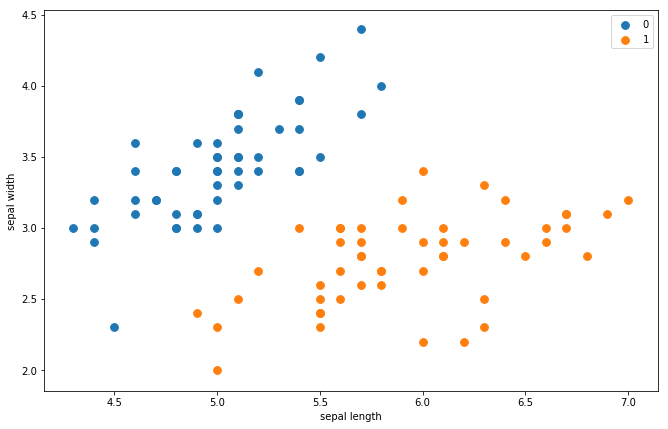

In [9]:
plt.figure(figsize=(11,7))
plt.scatter(df.loc[df['label'] == 0]['sepal length'],df.loc[df['label'] == 0]['sepal width'],s=60,label='0')
plt.scatter(df.loc[df['label'] == 1]['sepal length'],df.loc[df['label'] == 1]['sepal width'],s=60,label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**数据准备**

In [10]:
X, y = np.array(df.loc[:,['sepal length','sepal width']]), np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**模型训练与评测**

In [11]:
knn = KNN(X_train,y_train,k = 3)
knn.predict(X_test)

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1.])

In [12]:
knn.score(y_test)

1.0

**scikit-learn 实现**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
sk_knn.score(X_test, y_test)

1.0

# 习题

**3.1 在二维空间中给出实例点，画出 k 为 1 和 2 时的 K 近邻法构成的空间划分，并对其进行比较，体会 K 值选择与模型复杂度及预测准确率的关系。**

[可视化 knn](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

距离度量为欧氏距离，二分类。
$$
k = 1
$$
![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-20_k1_classify.png)
$$
k = 2
$$
![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-20_k2_classify.png)

白色部分的点为 $k$ 近邻算法计算结果为左右皆可的均衡点，可见当选取近邻增多时，模型变得简单（出现了大量左右皆可的点），近似误差增大，预测误差减小

**3.2 利用例题 3.2 构造的kd树求点 $x=(3,4.5)^T$ 的最近邻点。**

![]( https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2019-08-20_kd_Tree.png)

1. $(3,4.5)$与$(7,2)$相比，$3 < 7$ 前往左子树
2. 与$(5,4)$相比 $4.5 > 4$ ，前往右子树
3. 与$(4,7)$相比 $3 < 4$，前往左子树，已经是叶子节点，则$(4,7)$为当下最近点
4. 回退一级，采用欧氏距离， $(5,4)$ 比 $(4,7)$ 更近，更新$(5,4)$ 为最近点，距离为 2.06
5. 以$(3,4.5)$为中心半径为 2.06 的圆与$(2,3)$邻域相交，前往$(2,3)$
6. $(2,3)$ 距离 $(3,4.5)$距离更小，更新$(2,3)$为最近点，距离为1.8
7. 回退至$(7,2)$，距离大于1.8，且另一子区域与以$(2,3)$为圆心，半径为1.8的圆不相交，结束
8. $(3,4.5)$最邻近点为$(2,3)$

**3.3 写出输出为 $x$ 的 K 近邻的算法。**

1. 在 kd 树中找到包含目标点 $x$ 的叶节点：从根节点出发，大于节点值向右，小于节点值向左直到叶节点为止
2. 以当前节点为最近的 $k$ 个近邻集合 $T$ 的第一个值
3. 递归向上回退，并对每个节点：
   1. 如果 $T$ 内元素数小于 $k$ 或者该点距离 $x$ 比集合内各点到 $x$ 距离的最大值小，则直接加入或剔除最大距离点后加入
   2. 以 $x$ 为球心，当下近邻中的距离最大值为半径做超球体，看是否和当前节点的另一子区域相交，如果相交则前往另一子节点并递归寻找近邻，否则回退
4. 回退到根节点时，搜索结束。此时 $T$ 内的 $k$  个点就是 $x$ 的 $k$ 近邻

---

作者：Daniel Meng

GitHub：[LibertyDream](https://github.com/LibertyDream)

博客：[明月轩](https://libertydream.github.io/)